In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Opening Dataset

The dataset used is obtained frm UC Irvine Machine Learning Repository called [__`Credit Approval`__](https://archive.ics.uci.edu/dataset/27/credit+approval)

The file will be used is `crx.data`

In [2]:
df = pd.read_csv('datasets/crx.data', header=None)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


The features here are written in numbers without more detailed explanations. Based on the explanation [here](https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html#exploratory-analysis-and-data-transformations), those numbered features represent:- `0` = `Gender` : where 'a' represents male and 'b' represents female
- `1` = `Age` : the person's age
- `2` = `Debt` : the person's debt
- `3` = `Married` : marital status of the person. In assumption, 'u' means unmarried, 'y' means married, and 'l' means divorced
- `4` = `BankCustomer` : bank which has value 'g', 'p', and 'gg'
- `5` = `EducationLevel` : educational level which has 'w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff', and 'j'
- `6` = `Ethnicity` : ethnicity of the person which has value 'v', 'h', 'bb', 'ff', 'j', 'z', 'o', 'dd', and 'n'
- `7` = `YearsEmployed` : years of employment
- `8` = `PriorDefault` : prior defaulting on credit where 't' represents that the person has previously defaulted on credit while 'f' represents the person has no record regarding defaulting
- `9` = `Employed` : employement status where 't' represents that the person is employed while 'f' represents the person is unemployed
- `10` = `CreditScore` : numerical representation of an person's creditworthiness,
- `11` = `DriverLicense` : ownership of driver license where 't' represents that the person has driver license while 'f' represents the person has no driver license
- `12` = `Citizen` : the person's citizenship which has value 'g', 's', and 'p'. Those value probably represents country name's
- `13` = `ZipCode` : the zip code of where the person reside in
- `14` = `Income` : the person's income 
- `15` = `Approved` : where '+' represents approved while '-' represents disapproved

The feature `15` = `Approved` acted as the label for this classification case


# 2. Data Wrangling

## a. Data Cleaning

### - Handling Missing Data

In [3]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

There is no missing data if seen only from the NaN value. However, as a good practice, checking for a chacter or information that might represent no data is needed. 

In [4]:
def get_unique_val(df):
    """
    Function to get unique value on each feature from dataset

    :param df: Dataframe for the dataset
    :return: Dataframe containing the list of unique value and number of unique value from each feature
    """
    
    unique_val = []
    len_unique_val = []
    
    for col in df.columns:
      unique_val.append(list(df[col].unique()))
    
    for col in df.columns:
      len_unique_val.append(len(list(df[col].unique())))
    
    unique_data = {
        'Unique Value': unique_val,
        'Length': len_unique_val
    }
    
    return pd.DataFrame(unique_data)

In [5]:
get_unique_val(df)

,Unique Value,Length
0,"[b, a, ?]",3
1,"[30.83, 58.67, 24.50, 27.83, 20.17, 32.08, 33....",350
2,"[0.0, 4.46, 0.5, 1.54, 5.625, 4.0, 1.04, 11.58...",215
3,"[u, y, ?, l]",4
4,"[g, p, ?, gg]",4
5,"[w, q, m, r, cc, k, c, d, x, i, e, aa, ff, j, ?]",15
6,"[v, h, bb, ff, j, z, ?, o, dd, n]",10
7,"[1.25, 3.04, 1.5, 3.75, 1.71, 2.5, 6.5, 0.04, ...",132
8,"[t, f]",2
9,"[t, f]",2


From the unique value of each features, there is character '?' which could be considered as a value for missing data. In this case, the character '?' will be removed.

In [6]:
df = df[~(df == '?').any(axis=1)]
df.reset_index(drop=True, inplace=True)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
649,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
650,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
651,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### - Handling Inconsistent Format

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       653 non-null    object 
 1   1       653 non-null    object 
 2   2       653 non-null    float64
 3   3       653 non-null    object 
 4   4       653 non-null    object 
 5   5       653 non-null    object 
 6   6       653 non-null    object 
 7   7       653 non-null    float64
 8   8       653 non-null    object 
 9   9       653 non-null    object 
 10  10      653 non-null    int64  
 11  11      653 non-null    object 
 12  12      653 non-null    object 
 13  13      653 non-null    object 
 14  14      653 non-null    int64  
 15  15      653 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 81.8+ KB


There is a feature in which the data type has not match the purpose of the features:
- `1` = `Age` is in object where it should be in float

Thus, the data type for feature `1` (`Age`) will be casted as float

In [8]:
df[1] = df[1].astype('float')

C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\3074667626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[1] = df[1].astype('float')


### - Handling Categorical Features

To make sure that the data for several features easier for further process, thus the label encoding for features which are still in object type will be encoded. To maintain the value, features which has binary label will be encoded manually.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       653 non-null    object 
 1   1       653 non-null    float64
 2   2       653 non-null    float64
 3   3       653 non-null    object 
 4   4       653 non-null    object 
 5   5       653 non-null    object 
 6   6       653 non-null    object 
 7   7       653 non-null    float64
 8   8       653 non-null    object 
 9   9       653 non-null    object 
 10  10      653 non-null    int64  
 11  11      653 non-null    object 
 12  12      653 non-null    object 
 13  13      653 non-null    object 
 14  14      653 non-null    int64  
 15  15      653 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 81.8+ KB


In [10]:
unique_df = get_unique_val(df)

unique_df.loc[unique_df['Length'] == 2, ['Unique Value']]

,Unique Value
0,"[b, a]"
8,"[t, f]"
9,"[t, f]"
11,"[f, t]"
15,"[+, -]"


- For features `0` = `Gender`, value 'a' will be converted as 1 which represents male, while value 'b' converted as 0 represents female
- For features `8` = `PriorDefault`, value 't' will be converted as 1 which represents the person has previously defaulted on credit, while value 'f' converted as 0 represents the person has no record regarding defaulting
- For features `9` = `Employed`, value 't' will be converted as 1 which represents the person is employed, while value 'f' converted as 0 represents the person is unemployed
- For features `11` = `Driver License`, value 't' will be converted as 1 which represents the person has driver license, while value 'f' converted as 0 represents the person has no driver license
- For features `15` = `Approved`, value '+' will be converted as 1 which represents that the credit is approved, while value '-' converted as 0 represents that the credit is disapproved

Encode the feature `0` = `Gender`

In [11]:
df.loc[df[0] == 'a', 0] = 1
df.loc[df[0] == 'b', 0] = 0

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,1,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,0,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,0,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
649,1,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
650,1,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
651,0,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


Encode the feature `8` = `PriorDefault`, `9` = `Employed`, and `11` = `DriversLicense`

In [12]:
for col in [8, 9, 11]:
    df.loc[df[col] == 't', col] = 1
    df.loc[df[col] == 'f', col] = 0

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,00202,0,+
1,1,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,00043,560,+
2,1,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,00280,824,+
3,0,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,00100,3,+
4,0,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0,21.08,10.085,y,p,e,h,1.25,0,0,0,0,g,00260,0,-
649,1,22.67,0.750,u,g,c,v,2.00,0,1,2,1,g,00200,394,-
650,1,25.25,13.500,y,p,ff,ff,2.00,0,1,1,1,g,00200,1,-
651,0,17.92,0.205,u,g,aa,v,0.04,0,0,0,0,g,00280,750,-


Encode the feature `15` = `Approved`

In [13]:
df.loc[df[15] == '+', 15] = 1
df.loc[df[15] == '-', 15] = 0

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,00202,0,1
1,1,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,00043,560,1
2,1,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,00280,824,1
3,0,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,00100,3,1
4,0,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0,21.08,10.085,y,p,e,h,1.25,0,0,0,0,g,00260,0,0
649,1,22.67,0.750,u,g,c,v,2.00,0,1,2,1,g,00200,394,0
650,1,25.25,13.500,y,p,ff,ff,2.00,0,1,1,1,g,00200,1,0
651,0,17.92,0.205,u,g,aa,v,0.04,0,0,0,0,g,00280,750,0


Cast feature `0` = `Gender`, `8` = `PriorDefault`, `9` = `Employed`, `11` = `DriversLicense`, and `15` = `Approved` as integer

In [14]:
df[[0, 8, 9, 11, 15]] = df[[0, 8, 9, 11, 15]].astype('int64')

C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\907900684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[0, 8, 9, 11, 15]] = df[[0, 8, 9, 11, 15]].astype('int64')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       653 non-null    int64  
 1   1       653 non-null    float64
 2   2       653 non-null    float64
 3   3       653 non-null    object 
 4   4       653 non-null    object 
 5   5       653 non-null    object 
 6   6       653 non-null    object 
 7   7       653 non-null    float64
 8   8       653 non-null    int64  
 9   9       653 non-null    int64  
 10  10      653 non-null    int64  
 11  11      653 non-null    int64  
 12  12      653 non-null    object 
 13  13      653 non-null    object 
 14  14      653 non-null    int64  
 15  15      653 non-null    int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 81.8+ KB


Encode the remaining features which have object data type

In [16]:
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\3545278493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\3545278493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\3545278493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

## b. Data Analysis & Feature Engineering

### - Handling Imbalanced Data

Checking the balance for label data

([<matplotlib.patches.Wedge at 0x2ac780f00a0>,
 [Text(-0.16083096361402446, 1.0881789380166225, '0'),
  Text(0.16083096361402385, -1.0881789380166227, '1')],
 [Text(-0.08772598015310425, 0.5935521480090667, '54.67%'),
  Text(0.08772598015310391, -0.5935521480090669, '45.33%')])

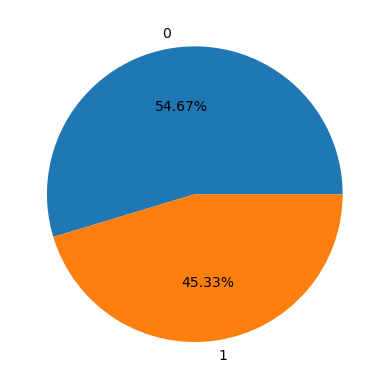

In [17]:
plt.pie(df[15].value_counts(), labels=df[15].value_counts().index, autopct='%1.2f%%')

Looking at the pie chart, it is still acceptable because the ratio of label 1 and label 0 can be considered slightly imbalance

### - Feature Selection

In [18]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,-0.042177,0.034906,-0.066742,-0.063122,0.011568,-0.057212,-0.084899,0.023251,0.065192,0.016683,-0.052315,-0.081948,-0.109199,-0.013099,0.019817
1,-0.042177,1.000000,0.217681,-0.091395,-0.105122,0.023282,-0.189454,0.417647,0.218637,0.103633,0.198153,0.058133,-0.021586,-0.090538,0.029078,0.180252
2,0.034906,0.217681,1.000000,-0.102243,-0.089745,0.009221,-0.030666,0.300600,0.236751,0.166092,0.269834,-0.006083,-0.105181,-0.266549,0.119754,0.207086
3,-0.066742,-0.091395,-0.102243,1.000000,0.981080,-0.045024,-0.021015,-0.089650,-0.116015,-0.158118,-0.104061,-0.009850,-0.037934,-0.001085,-0.118505,-0.179700
4,-0.063122,-0.105122,-0.089745,0.981080,1.000000,-0.051335,-0.026003,-0.081862,-0.129090,-0.169691,-0.110822,0.001747,-0.011931,0.013922,-0.018528,-0.169976
5,0.011568,0.023282,0.009221,-0.045024,-0.051335,1.000000,-0.000935,0.032704,0.105197,0.112155,-0.002706,0.069720,0.017234,0.107930,-0.006700,0.123314
6,-0.057212,-0.189454,-0.030666,-0.021015,-0.026003,-0.000935,1.000000,-0.094978,-0.034977,-0.001452,-0.037329,-0.004235,0.042494,-0.019605,-0.022527,-0.011023
7,-0.084899,0.417647,0.300600,-0.089650,-0.081862,0.032704,-0.094978,1.000000,0.336148,0.228035,0.327325,0.139317,-0.001762,-0.093188,0.052159,0.332728
8,0.023251,0.218637,0.236751,-0.116015,-0.129090,0.105197,-0.034977,0.336148,1.000000,0.430586,0.378264,0.089864,-0.110474,-0.064796,0.084427,0.738829
9,0.065192,0.103633,0.166092,-0.158118,-0.169691,0.112155,-0.001452,0.228035,0.430586,1.000000,0.569176,0.020223,-0.233452,-0.070939,0.068189,0.451866


Get 10 independent features which has best correlation (positive or negative correlation) to the label

In [19]:
corr_matrix = df.corr()
corr_matrix[15].abs().sort_values(ascending=False).head(11)

15    1.000000
8     0.738829
9     0.451866
10    0.406052
7     0.332728
2     0.207086
1     0.180252
3     0.179700
14    0.172766
4     0.169976
5     0.123314
Name: 15, dtype: float64

Excluding the label itself, the best 10 features are based on the correlation to the label are:
- `8` = `PriorDefault`
- `9` = `Employed`
- `10` = `CreditScore`
- `7` = `YearsEmployed`
- `2` = `Debt`
- `1` = `Age`
- `3` = `Married`
- `14` = `Income`
- `4` = `BankCustomer`
- `5` = `EducationLevel`

Those 10 features will be used for training

In [20]:
used_column = corr_matrix[15].abs().sort_values(ascending=False).head(11).index.tolist()
used_column.sort()

X = df[[col for col in used_column if col != 15]]
Y = df[15]

### - Handling Outlier

In [21]:
X.describe()

,1,2,3,4,5,7,8,9,10,14
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,1.229709,0.468606,5.773354,2.244296,0.534456,0.439510,2.502297,1013.761103
std,11.838267,5.027077,0.428193,0.845963,4.296249,3.371120,0.499194,0.496708,4.968497,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,1.000000,0.000000,1.000000,0.165000,0.000000,0.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,5.000000
75%,38.250000,7.500000,1.000000,0.000000,10.000000,2.625000,1.000000,1.000000,3.000000,400.000000
max,76.750000,28.000000,2.000000,2.000000,13.000000,28.500000,1.000000,1.000000,67.000000,100000.000000


At a glance, there are several features that have outliers because the

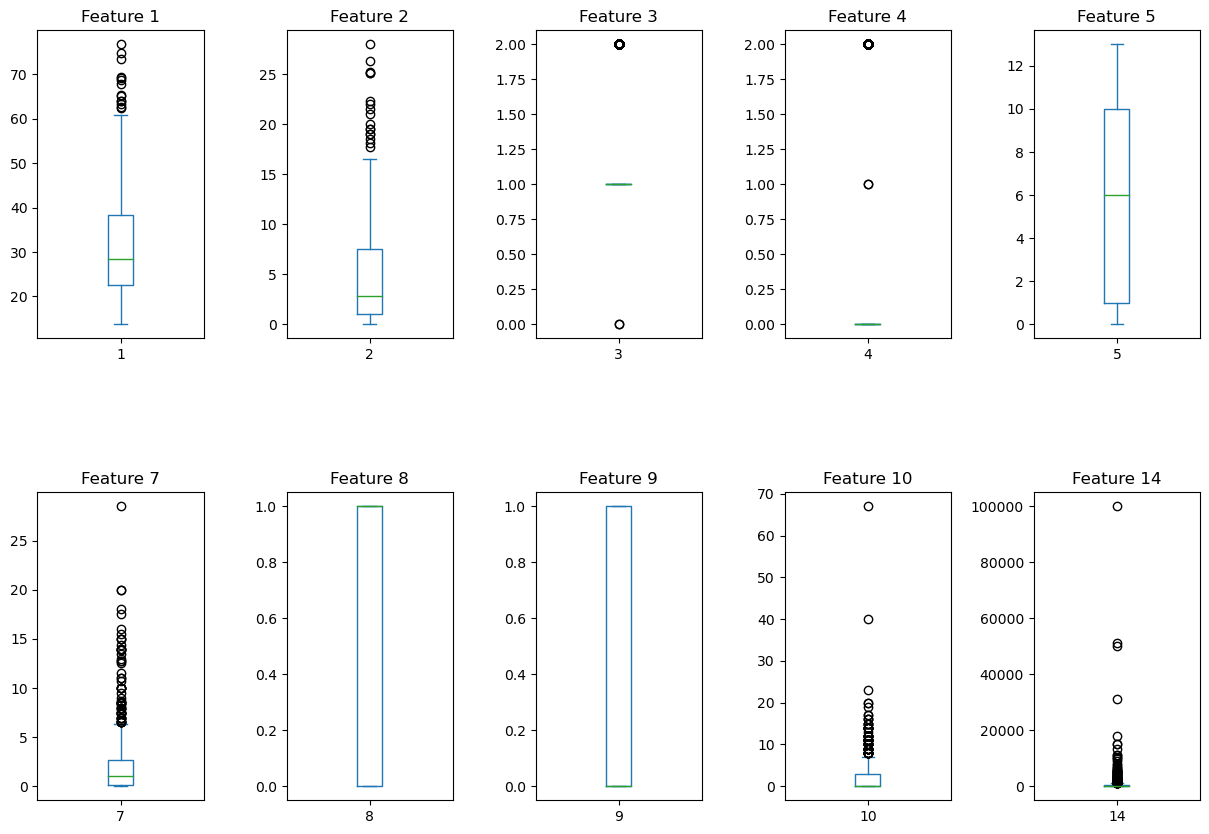

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(used_column[:(len(used_column) - 1)]):
    X[col].plot(kind='box', ax=axes[i])
    axes[i].set_title("Feature {}".format(col))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Focusing on the outlier on feature `1` (`Age`), `2` (`Debt`), `7` (`YearsEmployed`), `10` (`Credit Score`), and `14` (`Income`), the outliers will be replaced by upper or lower as the representative statistic value to maintain the interpretation of the value

In [23]:
def outlier_imputation(df, col):
    """
    Function to replace the outlier
    - If the outlier more than upper extreme, than the new value of outlier is the upper extreme
    - If the outlier less than lower extreme, than the new value of outlier is the lower extreme

    :param df: Dataframe for the dataset
    :param col: Integer containing the feature number
    :return: Dataframe containing the replaced outlier within the specific features `col`
    """
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    lower_extreme = Q1 - (1.5 * (Q3 - Q1))
    upper_extreme = Q3 + (1.5 * (Q3 - Q1))
    
    out_upper = df[(df[col] > upper_extreme)].values
    out_lower = df[(df[col] < lower_extreme)].values
    
    df[col].replace(out_upper, upper_extreme, inplace=True)
    df[col].replace(out_lower, lower_extreme, inplace=True)

    return df[col]

In [24]:
col_outlier = [1, 2, 7, 10, 14]

X[col_outlier] = X[col_outlier].astype('float64')

for col in col_outlier:
    X[col] = outlier_imputation(X, col)

C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\2910217570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_outlier] = X[col_outlier].astype('float64')
C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\2717818826.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace(out_upper, upper_extreme, inplace=True)
C:\Users\Vita\AppData\Local\Temp\ipykernel_29736\2717818826.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [25]:
X.describe()

,1,2,3,4,5,7,8,9,10,14
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.0,653.000000
mean,31.831432,7.578507,1.229709,0.468606,5.773354,3.567917,0.534456,0.439510,7.5,791.863706
std,11.806778,6.806746,0.428193,0.845963,4.296249,2.736929,0.499194,0.496708,0.0,350.994505
min,13.750000,0.080000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,7.5,7.000000
25%,22.670000,1.250000,1.000000,0.000000,1.000000,0.585000,0.000000,0.000000,7.5,582.000000
50%,28.670000,4.500000,1.000000,0.000000,6.000000,3.750000,1.000000,0.000000,7.5,1000.000000
75%,38.750000,17.190000,1.000000,0.000000,10.000000,6.315000,1.000000,1.000000,7.5,1000.000000
max,61.755000,17.190000,2.000000,2.000000,13.000000,6.315000,1.000000,1.000000,7.5,1000.000000


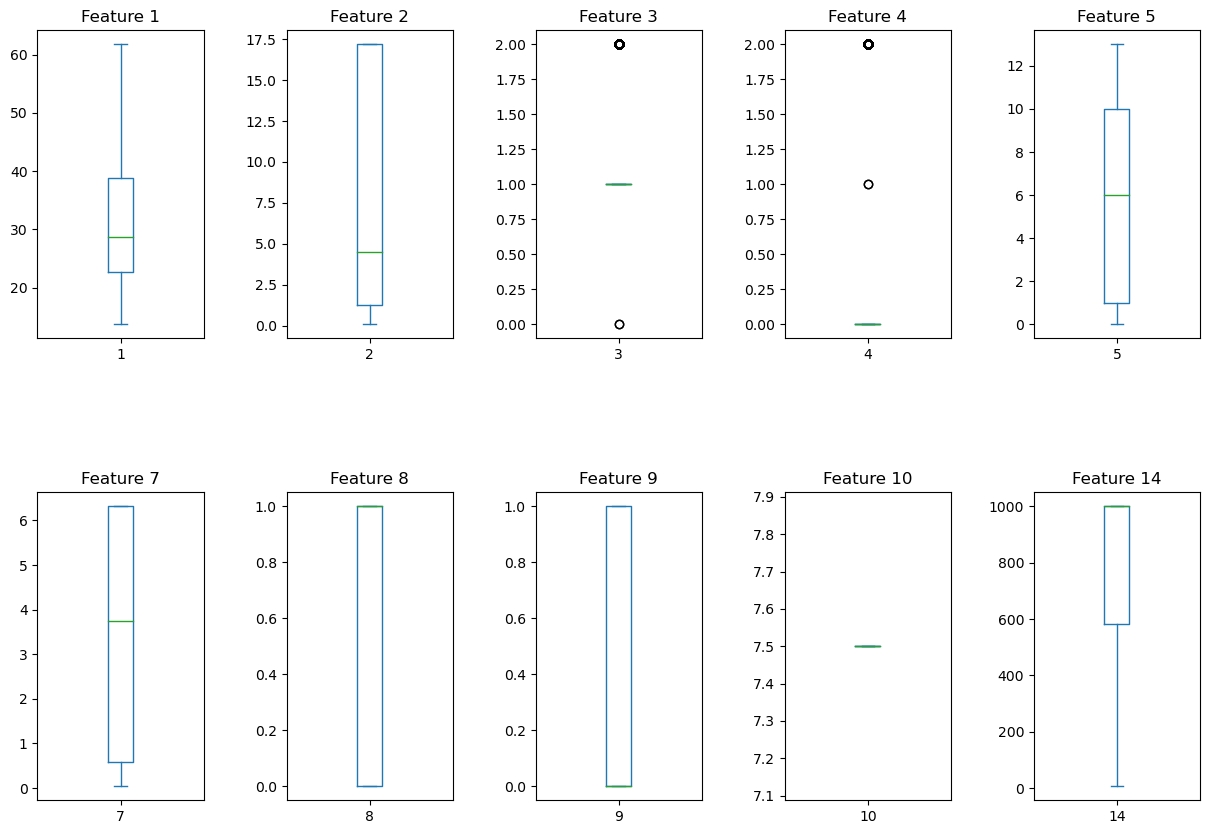

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(used_column[:(len(used_column) - 1)]):
    X[col].plot(kind='box', ax=axes[i])
    axes[i].set_title("Feature {}".format(col))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### - Split Dataset into Train and Test Set

Split the dataset in ratio train:test = 80:20

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)

### - Feature Scaling

To preserves the shape of original distribution, the data will be scaled using MinMaxScaler

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Training Model

## a. Logistic Regression

### - Model Initialization

In [29]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

### - Model Training & Hyperparameter Tuning

For logistic regression model on this case, the parameter used focused on:
- `C`: inverse of regularization strength
- `tol`: tolerance for stopping criteria
- `max_iter`: maximum number of iterations taken for the solvers to converge
- `penalty`: add a penalty term
- `solver`: algorithm to use in the optimization problem. Use 'liblinear' as the dataset is considered small

The `GridSearchCV` will search for the model parameter with the best score while doing a 5-folds cross-validation

In [30]:
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'tol': [0.01, 0.001, 0.0001],
    'max_iter' : [100, 150, 200, 250],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear']
}

logreg_grid_search = GridSearchCV(logreg_model, logreg_params, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 150, 200, 250],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='accuracy')

### - Model Evaluation

In [31]:
logreg_best_params = logreg_grid_search.best_params_
logreg_best_model = logreg_grid_search.best_estimator_
logreg_best_score = logreg_grid_search.best_score_

print("""
Best Parameter = {}
Best Score = {}
""".format(logreg_best_params, logreg_best_score))
logreg_best_model


Best Parameter = {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Best Score = 0.8811538461538462



LogisticRegression(C=10, penalty='l1', solver='liblinear', tol=0.01)

### - Model Prediction

Predict some sample of test dataset using the logistic regression model with best parameters obtained

In [32]:
logreg_y_pred = logreg_best_model.predict(X_test)

In [33]:
pd.DataFrame({
    'y_true' : y_test[:10],
    'y_pred' : logreg_y_pred[:10]
})

,y_true,y_pred
109,0,1
274,0,0
199,1,1
429,0,0
447,0,0
457,0,0
292,0,1
155,1,1
101,0,1
268,0,0


### - Performance Evaluation

In [34]:
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)
logreg_confusion = confusion_matrix(y_test, logreg_y_pred)

In [35]:
pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1]
})

,Metrics,Score
0,Accuracy,0.839695
1,Precision,0.757576
2,Recall,0.909091
3,F1 Score,0.826446


In [36]:
print("Confusion Matrix for Logistic Regression:\n {}".format(logreg_confusion))

Confusion Matrix for Logistic Regression:
 [[60 16]
 [ 5 50]]


## b. Random Forest

### - Model Initialization

In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### - Model Training & Hyperparameter Tuning

For random forest model on this case, the parameter used focused on:
- `n_estimators`: the number of trees in the forest
- `criterion`: the function to measure the quality of a split.
- `max_depth`: the maximum depth of the tree
- `min_samples_split`: the minimum number of samples required to split an internal node
- `min_samples_leaf`: the minimum number of samples required to be at a leaf node
- `max_features`: the number of features to consider when looking for the best split

The `GridSearchCV` will search for the model parameter with the best score while doing a 5-folds cross-validation

In [38]:
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 3, 5, 7, 9],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

### - Model Evaluation

In [39]:
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_
rf_best_score = rf_grid_search.best_score_

print("""
Best Parameter = {}
Best Score = {}
""".format(rf_best_params, rf_best_score))
rf_best_model


Best Parameter = {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}
Best Score = 0.8907692307692308



RandomForestClassifier(max_depth=30, min_samples_split=6, n_estimators=50)

### - Model Prediction

Predict some sample of test dataset using the random forest model with best parameters obtained

In [40]:
rf_y_pred = rf_best_model.predict(X_test)

In [41]:
pd.DataFrame({
    'y_true' : y_test[:10],
    'y_pred' : rf_y_pred[:10]
})

,y_true,y_pred
109,0,1
274,0,0
199,1,1
429,0,0
447,0,0
457,0,0
292,0,0
155,1,1
101,0,0
268,0,0


### - Performance Evaluation

In [42]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_confusion = confusion_matrix(y_test, rf_y_pred)

In [43]:
pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [rf_accuracy, rf_precision, rf_recall, rf_f1]
})

,Metrics,Score
0,Accuracy,0.862595
1,Precision,0.836364
2,Recall,0.836364
3,F1 Score,0.836364


In [44]:
print("Confusion Matrix for Random Forest:\n {}".format(rf_confusion))

Confusion Matrix for Random Forest:
 [[67  9]
 [ 9 46]]


## c. XGBoost

### - Model Initialization

In [45]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### - Model Training & Hyperparameter Tuning

For XGBoost model on this case, the parameter used focused on:
- `learning_rate`: the step size shrinkage used in update to prevents overfitting. 
- `max_depth`: the maximum depth of a tree
- `min_child_weight`: the minimum sum of instance weight needed in a child.

The `GridSearchCV()` will search for the model parameter with the best score while doing a 5-folds cross-validation

In [46]:
xgb_params = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [10, 20, 30, 40, 50],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

### - Model Evaluation

In [47]:
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_score = xgb_grid_search.best_score_

print("""
Best Parameter = {}
Best Score = {}
""".format(xgb_best_params, xgb_best_score))
xgb_best_model


Best Parameter = {'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 7}
Best Score = 0.8755128205128205



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### - Model Prediction

Predict some sample of test dataset using the XGBoost model with best parameters obtained

In [48]:
xgb_y_pred = xgb_best_model.predict(X_test)

In [49]:
pd.DataFrame({
    'y_true' : y_test[:10],
    'y_pred' : xgb_y_pred[:10]
})

,y_true,y_pred
109,0,1
274,0,0
199,1,1
429,0,0
447,0,0
457,0,0
292,0,0
155,1,1
101,0,0
268,0,0


### - Performance Evaluation

In [50]:
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_confusion = confusion_matrix(y_test, xgb_y_pred)

In [51]:
pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

,Metrics,Score
0,Accuracy,0.816794
1,Precision,0.771930
2,Recall,0.800000
3,F1 Score,0.785714


In [52]:
print("Confusion Matrix for XGBoost:\n {}".format(xgb_confusion))

Confusion Matrix for XGBoost:
 [[63 13]
 [11 44]]


# 4. Conclusion

In [53]:
pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LogisticRegression': [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1],
    'RandomForest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

,Metrics,LogisticRegression,RandomForest,XGBoost
0,Accuracy,0.839695,0.862595,0.816794
1,Precision,0.757576,0.836364,0.771930
2,Recall,0.909091,0.836364,0.800000
3,F1 Score,0.826446,0.836364,0.785714


From the metrics above, Random Forest can be considered as the best model due to the highest accuracy and F1 Score. As the data is slightly imbalance, F1 Score might be the best consideration for model perfomance metrics. Thus, the best model for doing credit card approval using best 10 features correlation from `Credit Approval` dataset is __Random Forest__ with the following parameters:
- 'criterion': 'gini'
- 'max_depth': 30
- 'max_features': 'sqrt'
- 'min_samples_leaf': 1
- 'min_samples_split': 6
- 'n_estimators': 50